<a href="https://colab.research.google.com/github/Yifan-nnnn/heyyy/blob/main/HW03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW03 Data Analysis

## 標題：鐵達尼號乘客生存分析報告

## 摘要

本報告基於 seaborn 提供的 titanic 資料集，探討鐵達尼號乘客的生存情況，分析不同性別、年齡、艙等等因素對生還率的影響。透過數據視覺化與統計分析，提供對災難中人員生還機率的理解，並從中提出可能的社會與行為觀察。

## 引言

### 背景
1912 年鐵達尼號沉船事故造成大量人員傷亡，不同乘客的背景條件（如艙等、性別、年齡）可能影響其生存率。透過歷史數據分析，我們能更深入了解災難中人類行為的模式與社會資源分配的潛在問題。

### 目的
本研究旨在透過資料分析探索鐵達尼號乘客生還率背後的關鍵因素，並針對不同變數（如性別、年齡、艙等）進行比較與視覺化呈現。


### 待答問題
1. 不同性別的乘客，其生存率是否存在顯著差異？
2. 年齡是否會影響乘客的生存機率？
3. 艙等高低是否與生還機會有相關？

## 方法

### 數據來源
本研究使用 `seaborn` 內建的 `titanic` 資料集，該數據集涵蓋乘客的年齡、性別、艙等、生還與否等資訊。

### 分析工具
- **Python**（數據處理與分析）
- **Pandas**（數據清理與統計分析）
- **Matplotlib / Seaborn**（數據視覺化）

### 數據處理
1. 載入 titanic 數據集並觀察數據結構與缺漏值情況

2. 探索性數據分析（EDA）：觀察性別、生還率與年齡的分布

3. 使用長條圖、箱型圖與分布圖等進行視覺化

4. 計算與比較各分類變數下的生存率

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

titanic = sns.load_dataset("titanic")

print(titanic.head())

titanic.info()

df = sns.load_dataset('titanic')
df_clean = df[['survived', 'sex', 'age', 'pclass']].dropna()

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

## 結果與分析

### 帳單總金額與小費的關係
我們使用散點圖來觀察帳單總金額（total_bill）與小費（tip）之間的關係。

In [4]:
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2025-06-16 13:15:40--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.137.139, 74.125.137.100, 74.125.137.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.137.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-06-16 13:15:40--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.137.132, 2607:f8b0:4023:c03::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.137.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘taipei_sans_tc_beta.ttf’

taipei_sans_tc_beta 100%[===================>]  19.70M  78.1MB/s    in 0.3s    

2025-06-16 13:15:43 (7

In [6]:
import matplotlib
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')
plt.rcParams['font.sans-serif'] = 'Taipei Sans TC Beta'
plt.rcParams["axes.unicode_minus"] = False

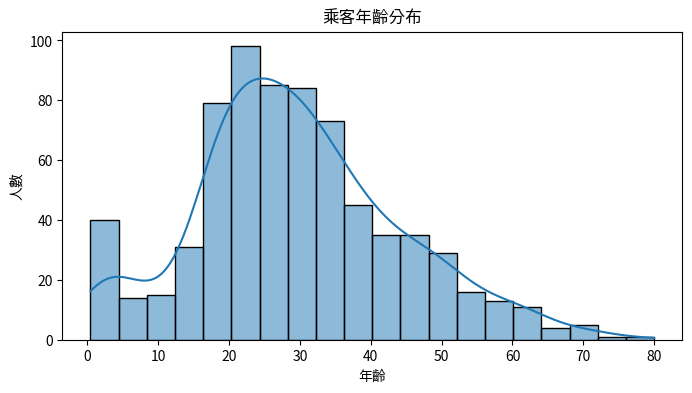

In [7]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_clean, x='age', bins=20, kde=True)
plt.title('乘客年齡分布')
plt.xlabel('年齡')
plt.ylabel('人數')
plt.show()

**分析結果**：從圖中可以看出，帳單總金額越高，小費通常也越高，但並非線性關係。

In [8]:
print("\n按性別計算生存率：")
print(df_clean.groupby('sex')['survived'].mean())

print("\n按艙等計算生存率：")
print(df_clean.groupby('pclass')['survived'].mean())


按性別計算生存率：
sex
female    0.754789
male      0.205298
Name: survived, dtype: float64

按艙等計算生存率：
pclass
1    0.655914
2    0.479769
3    0.239437
Name: survived, dtype: float64


### 觀察性別、生還率與年齡的分布

我們計算不同性別的生存率，並以直方圖觀察整體趨勢。

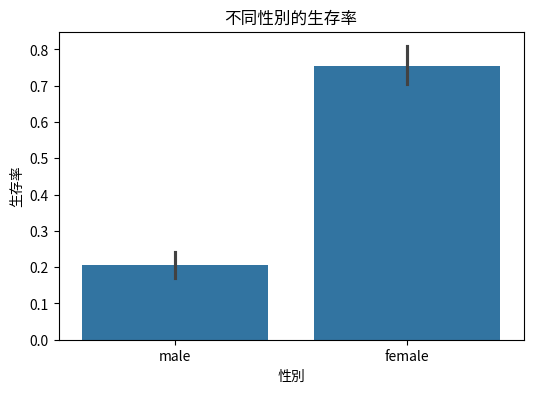

In [9]:
plt.figure(figsize=(6, 4))
sns.barplot(x='sex', y='survived', data=df_clean)
plt.title('不同性別的生存率')
plt.ylabel('生存率')
plt.xlabel('性別')
plt.show()

**分析結果**：女性乘客的生存率顯著高於男性，顯示在緊急情況下，女性較可能獲得優先逃生的機會。

### 不同艙等、年齡的生存率高低情形
我們透過長條圖呈現性別與艙等的生存率，並使用箱型圖觀察年齡與生存狀態之間的分布差異，以更直觀地理解變數間的關係。

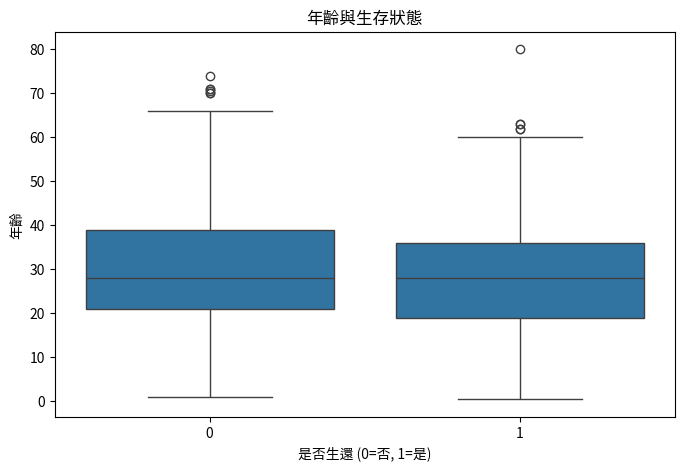

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='survived', y='age', data=df_clean)
plt.title('年齡與生存狀態')
plt.xlabel('是否生還 (0=否, 1=是)')
plt.ylabel('年齡')
plt.show()

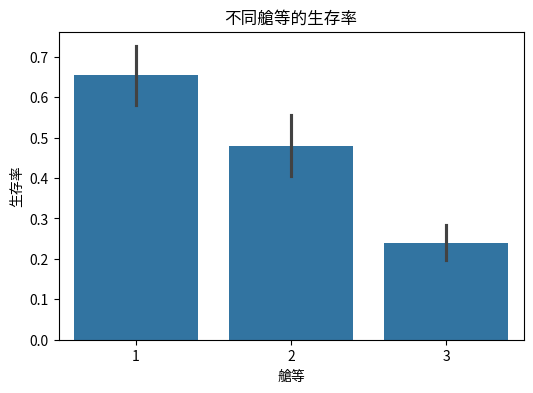

In [11]:
plt.figure(figsize=(6, 4))
sns.barplot(x='pclass', y='survived', data=df_clean)
plt.title('不同艙等的生存率')
plt.xlabel('艙等')
plt.ylabel('生存率')
plt.show()

### 計算與比較各分類變數下的生存率

我們進一步交叉比對性別與艙等兩個變數，統計不同組合下的平均生存率，並使用群組長條圖視覺化，觀察是否存在明顯的差異或交互效果。

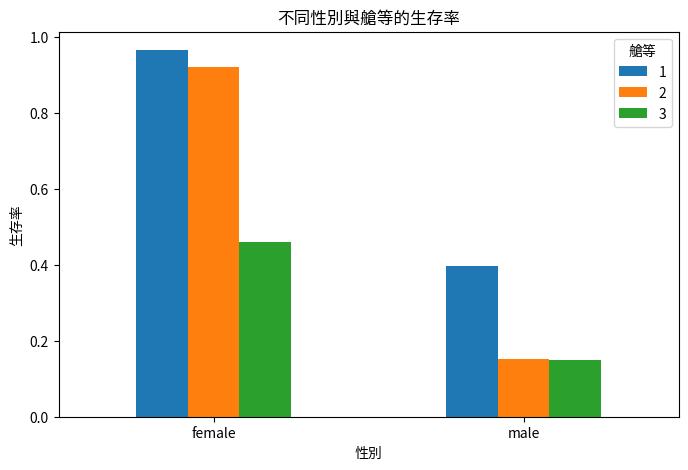

In [12]:
survival_by_group = df_clean.groupby(['sex', 'pclass'])['survived'].mean().unstack()
survival_by_group.plot(kind='bar', figsize=(8,5))
plt.title('不同性別與艙等的生存率')
plt.ylabel('生存率')
plt.xlabel('性別')
plt.legend(title='艙等')
plt.xticks(rotation=0)
plt.show()

**分析結果**：
- 較年幼的乘客有略高的生存率，顯示孩童在逃生過程中可能受到照顧；不過年齡對生還率的影響並不絕對，仍需結合其他變數進一步分析。
- 乘客艙等與生存機會有明顯關聯。一等艙乘客的生存率明顯高於二等與三等艙，顯示艙等可能影響可接觸到的逃生資源或通道優先順序。
- 女性在所有艙等中生還率皆高於男性，且一等艙女性的生存率最高。三等艙男性的生還率最低，顯示性別與艙等具有交互影響。


## 結論與建議


### 結論
1. 女性乘客的生還率明顯高於男性

2. 年齡與生還率間存在一定趨勢，孩童生存率略高

3. 一等艙乘客的生存率遠高於三等艙乘客

### 建議
1. 災難管理應考慮資源分配的公平性，避免艙等影響求生機會

2. 加強船員與乘客的逃生訓練與緊急應變能力

3. 後續可進一步研究家庭人數、登船港口等變數對生存機率的影響


